<a href="https://colab.research.google.com/github/Sharuk-baba/Research/blob/main/KoopmanExampleGPT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch transformers numpy scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2").eval()

def preprocess_input(prompt):
    """Tokenizes and encodes input prompt."""
    inputs = tokenizer(prompt, return_tensors="pt")
    return inputs


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [43]:
def generate_text(prompt, num_samples=5, max_length=50):
    """Generates foresight samples using GPT-2."""
    inputs = preprocess_input(prompt)

    with torch.no_grad():
        outputs = model.generate(**inputs, max_length=max_length, num_return_sequences=num_samples, do_sample=True,temperature=1.0)

    return [tokenizer.decode(out, skip_special_tokens=True) for out in outputs]

# Example usage
prompt = "The future of artificial intelligence is"
generated_samples = generate_text(prompt)
print(generated_samples)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['The future of artificial intelligence is under intense scrutiny, particularly after IBM\'s AI-powered visioned computer was demonstrated at the 2010 AI conference. But to date there is no new machine learning technology that can take that role.\n\n"We must start', 'The future of artificial intelligence is a whole lot more complicated—it\'s a huge question. We never knew how it was going to come to be and it\'s something we\'ve been trying to tackle.\n\n"I think the technology has gotten better', "The future of artificial intelligence is coming around. Artificial intelligence applications still require a set of standard knowledge bases and standards, and we're currently hearing that people are starting to look beyond our own, and eventually to the outside world.\n\nFor example:", 'The future of artificial intelligence is up in the air," said the man who made the comments. "AI will still be very much at the core of anything this technology gets on our computers."\n\nA decade ago, Dr. A

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

def embed_text(samples):
    """Converts text samples into vector representations using TF-IDF."""
    vectorizer = TfidfVectorizer()
    embeddings = vectorizer.fit_transform(samples).toarray()
    return embeddings

# Convert generated text to vectors
text_vectors = embed_text(generated_samples)
print(text_vectors.shape)


(5, 118)


In [38]:
import numpy as np

def koopman_operator(X):
    """Computes Koopman operator using least squares."""
    X1, X2 = X[:-1], X[1:]  # Shifted data
    K = np.linalg.lstsq(X1, X2, rcond=None)[0]  # Solve for K
    return K

# Compute Koopman operator
K = koopman_operator(text_vectors)
print(K.shape)


(118, 118)


In [39]:
def predict_trajectory(X, K, steps=3):
    """Predicts future embeddings using the Koopman operator."""
    predictions = [X[-1]]
    for _ in range(steps):
        predictions.append(predictions[-1] @ K)
    return np.array(predictions)

def rank_and_generate(X, samples):
    """Ranks foresight samples and selects the best response."""
    future_predictions = predict_trajectory(X, K)
    best_idx = np.argmax(np.linalg.norm(future_predictions, axis=1))
    return samples[best_idx]

# Get best response
best_response = rank_and_generate(text_vectors, generated_samples)
print("Best Predicted Response:", best_response)


Best Predicted Response: The future of artificial intelligence is coming.

The future of AI will come at the expense of humans, and of us. How is society going to adapt to this?

I do not want to take a risk with this subject. In


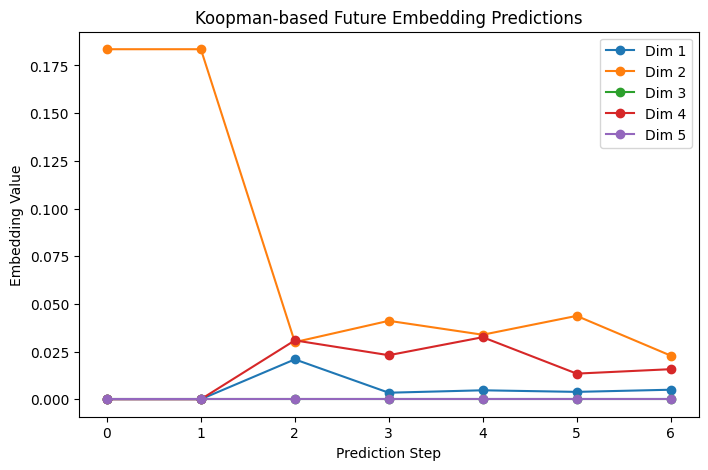

In [46]:
import matplotlib.pyplot as plt

def visualize_koopman(X, K, steps=5):
    """Plots how the embeddings evolve using Koopman predictions."""
    predictions = predict_trajectory(X, K, steps)  # Get future embeddings
    predictions = np.vstack((X[-1], predictions))  # Include initial embedding

    time_steps = range(predictions.shape[0])  # Ensure x-axis matches y-axis

    plt.figure(figsize=(8, 5))
    for i in range(min(5, X.shape[1])):  # Plot first few embedding dimensions
        plt.plot(time_steps, predictions[:, i], marker='o', label=f"Dim {i+1}")

    plt.xlabel("Prediction Step")
    plt.ylabel("Embedding Value")
    plt.title("Koopman-based Future Embedding Predictions")
    plt.legend()
    plt.show()

# Run visualization again
visualize_koopman(text_vectors, K)


In [41]:
def generate_greedy(prompt, max_length=50):
    inputs = preprocess_input(prompt)
    with torch.no_grad():
        output = model.generate(**inputs, max_length=max_length, do_sample=False)  # No sampling
    return tokenizer.decode(output[0], skip_special_tokens=True)

greedy_response = generate_greedy(prompt)
print("Greedy Response:", greedy_response)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Greedy Response: The future of artificial intelligence is uncertain.

"We're not sure what the future will look like," said Dr. Michael S. Schoenfeld, a professor of computer science at the University of California, Berkeley. "But we're not
